<a href="https://colab.research.google.com/github/Aqillaaprly/rakamin_homework/blob/main/Aqilla_Aprily_Batch__Homework_ML_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/rakamin/Product_Exclusive_Classification.csv")
df.head()


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

In [ ]:
# 1A: Struktur & tipe data
print("=== df.info() ===")
df.info()

# 1B: Stat summary numeric
print("\n=== Numeric describe ===")
display(df.describe())

# 1C: Stat summary categorical
print("\n=== Categorical describe ===")
display(df.describe(include='all'))


=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB

=== Numeric describe ===


,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000



=== Categorical describe ===


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,8000,7987,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
unique,NaN,310,142,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SEPHORA COLLECTION,Perfume,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,492,619,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.910231e+06,NaN,NaN,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,NaN,NaN,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,NaN,NaN,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,NaN,NaN,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,NaN,NaN,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,NaN,NaN,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000


In [ ]:
# missing values
missing = df.isnull().sum()
missing = missing[missing>0].sort_values(ascending=False)
print("\nB. Columns with missing values (count):")
print(missing if not missing.empty else "No missing values")

# C: suspicious summary
print("\nC. Suspicious summaries (quick checks):")
for col in df.select_dtypes(include=np.number).columns:
    s = df[col].describe()
    if s['min'] == s['max']:
        print(f"- {col} constant value: {s['min']}")
    if s['count'] < 0.5*len(df):
        print(f"- {col} many missing (count {s['count']})")
for col in df.select_dtypes(include=['object','category']).columns:
    n = df[col].nunique(dropna=True)
    if n > 50:
        print(f"- {col} has many unique categories: {n}")


B. Columns with missing values (count):
rating               95
love                 34
value_price          17
category             13
number_of_reviews     9
price                 8
dtype: int64

C. Suspicious summaries (quick checks):
- brand has many unique categories: 310
- category has many unique categories: 142


### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Semua tipe data kolom sudah sesuai dengan isi datanya.
- Kolom kategorikal seperti brand dan category memiliki tipe data object.
- Kolom numerik seperti rating, price, dan love memiliki tipe data float64 dan int64.
- Nama-nama kolom juga sudah jelas dan deskriptif.


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Ya, terdapat nilai kosong di beberapa kolom. Ini terlihat dari df.info() di mana jumlah Non-Null Count lebih rendah dari total entri (8000). Kolom-kolom tersebut adalah:
- category (7987 non-null)
- rating (7905 non-null)
- number_of_reviews (7991 non-null)
- love (7966 non-null)
- price (7992 non-null)
- value_price (7983 non-null)


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?(min/mean/median/max/unique/top/freq)
1. Distribusi Miring (Skewed Distribution): Pada kolom number_of_reviews, love, price, dan value_price, nilai rata-rata (mean) jauh lebih tinggi daripada nilai median (50%).
Contoh (love): Mean ≈ 17,563 sedangkan Median = 5,500.
Ini menandakan distribusinya sangat miring ke kanan (right-skewed), artinya ada beberapa produk dengan nilai yang sangat tinggi (outlier) yang menarik rata-ratanya.

2. Imbalance Class pada Target: Kolom exclusive (target) memiliki mean sekitar 0.255. Karena nilainya hanya 0 dan 1, ini berarti hanya sekitar 25.5% dari produk di dataset yang bersifat eksklusif (kelas 1), sementara sisanya (sekitar 74.5%) tidak. Ini menunjukkan adanya class imbalance.

3. Kardinalitas Tinggi: Kolom kategorikal memiliki jumlah kategori unik yang cukup banyak.
brand memiliki 310 kategori unik (unique).
category memiliki 142 kategori unik (unique).
Ini disebut high cardinality dan mungkin memerlukan penanganan khusus sebelum pemodelan.

# Exploratory Data Analysis (EDA)

## Pendekatan Grafis

### Univariate Analysis (20 Poin)

### Distribusi Kolom Numerik ###


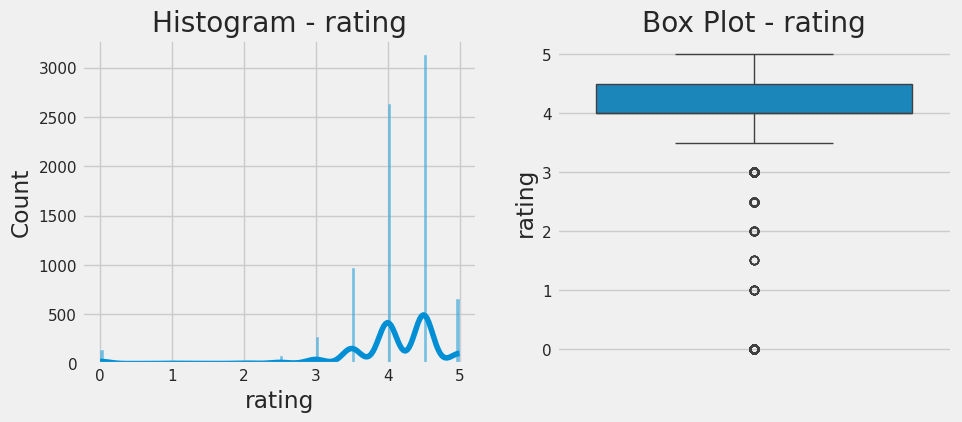

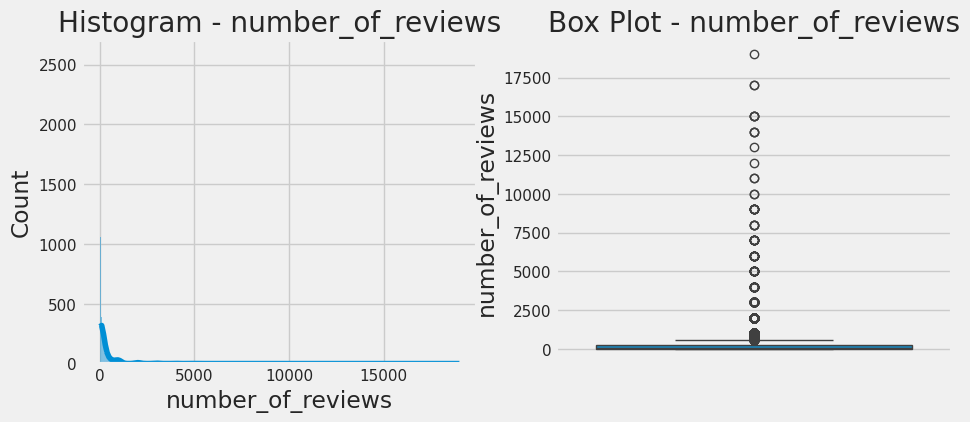

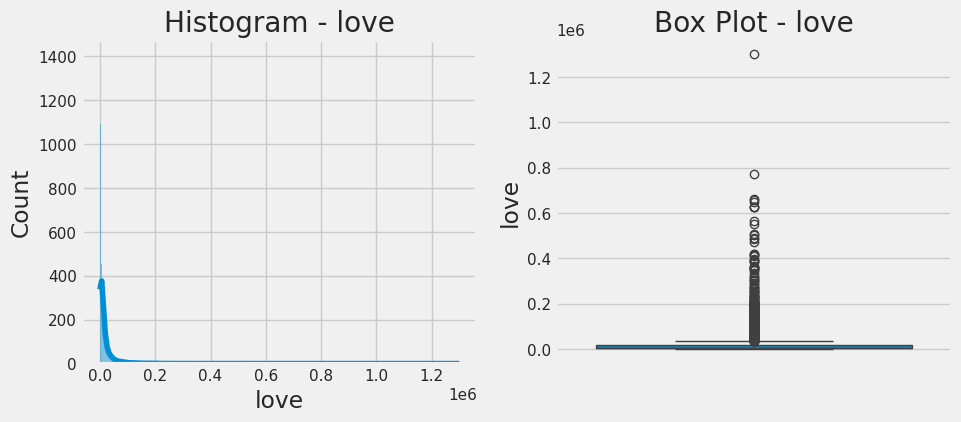

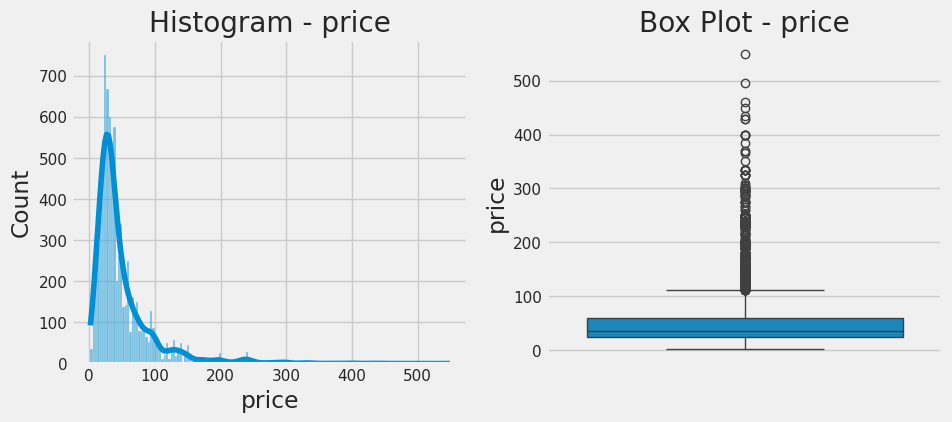

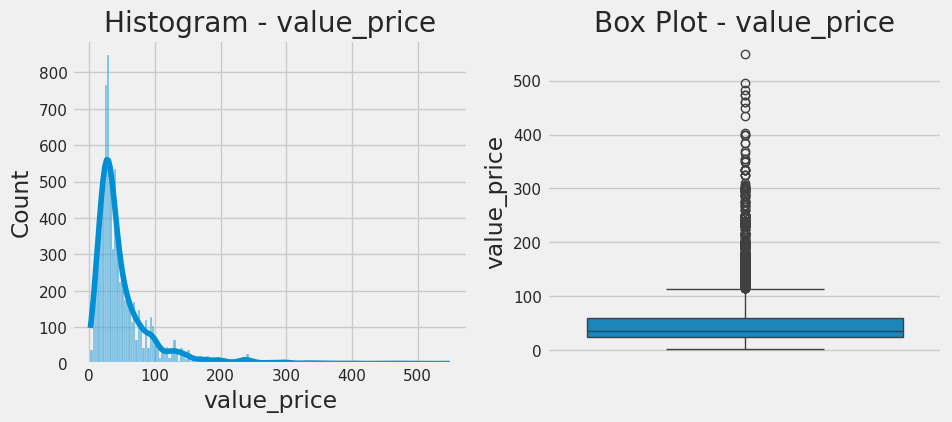


### Distribusi Kolom Kategorikal ###


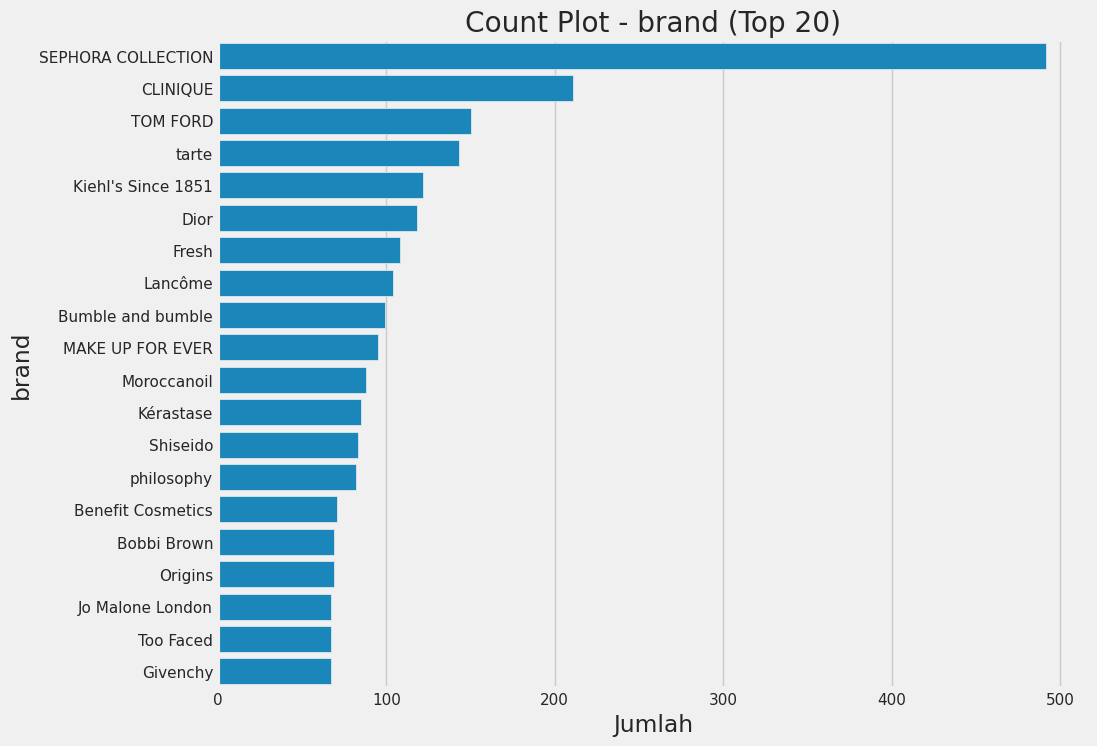

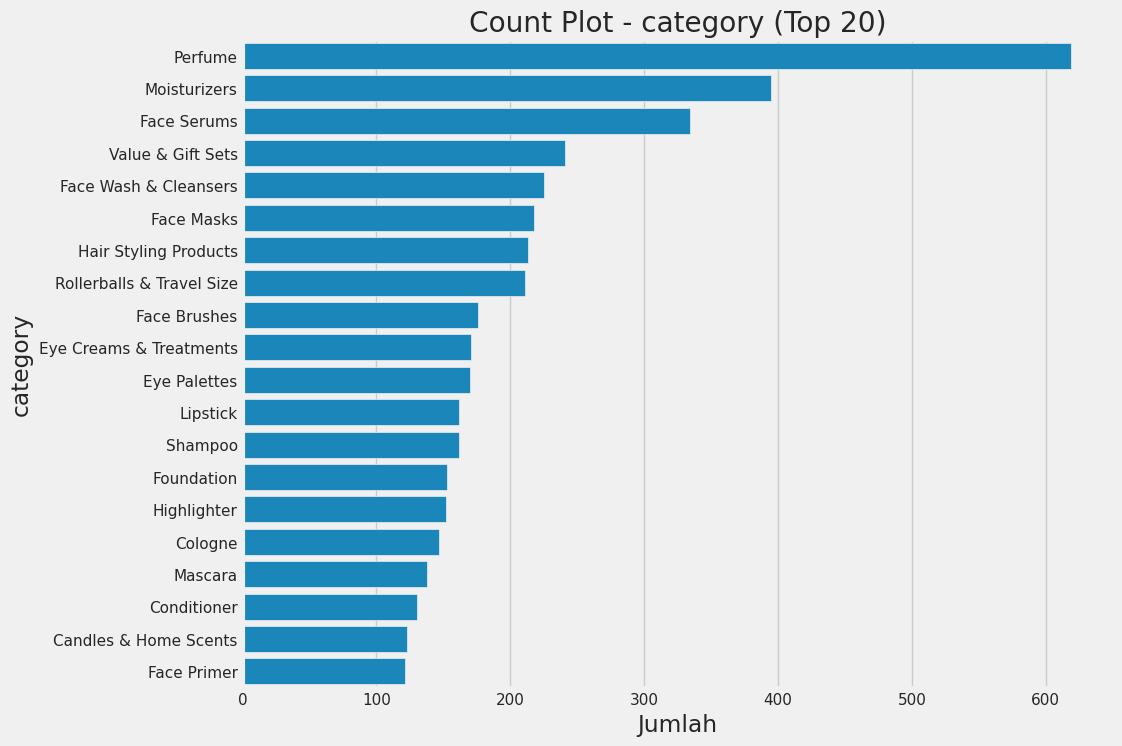


### Distribusi Kolom Target ###


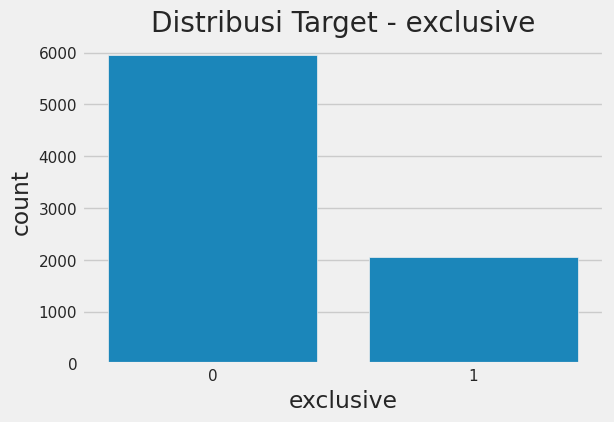

In [ ]:
numerical_cols = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']
categorical_cols = ['brand', 'category']
target_col = 'exclusive'

# Visualisasi untuk kolom numerik
print("### Distribusi Kolom Numerik ###")
for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot - {col}')

    plt.show()

# Visualisasi untuk kolom kategorikal
print("\n### Distribusi Kolom Kategorikal ###")
for col in categorical_cols:
    # Mengambil top 20 kategori teratas untuk visualisasi agar tidak terlalu ramai
    top_categories = df[col].value_counts().nlargest(20).index
    df_top = df[df[col].isin(top_categories)]

    plt.figure(figsize=(10, 8))
    sns.countplot(y=df_top[col], order=top_categories)
    plt.title(f'Count Plot - {col} (Top 20)')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.show()

# Visualisasi untuk kolom target
print("\n### Distribusi Kolom Target ###")
plt.figure(figsize=(6, 4))
sns.countplot(x=df[target_col])
plt.title(f'Distribusi Target - {target_col}')
plt.show()

Berdasarkan analisis visual, sebagian besar fitur numerik seperti `price` dan `love` menunjukkan distribusi yang sangat **miring ke kanan (right-skewed)** dengan banyak **outlier**, sehingga perlu dilakukan **transformasi logaritmik**. Fitur kategorikal seperti `brand` dan `category` memiliki **kardinalitas tinggi** (banyak kategori unik) yang perlu disederhanakan dengan mengelompokkan kategori yang jarang muncul. Terakhir, kolom target `exclusive` menunjukkan adanya **class imbalance** yang signifikan, yang harus ditangani dengan teknik *resampling* seperti SMOTE sebelum melatih model.

### Multivariate Analysis (10 Poin)

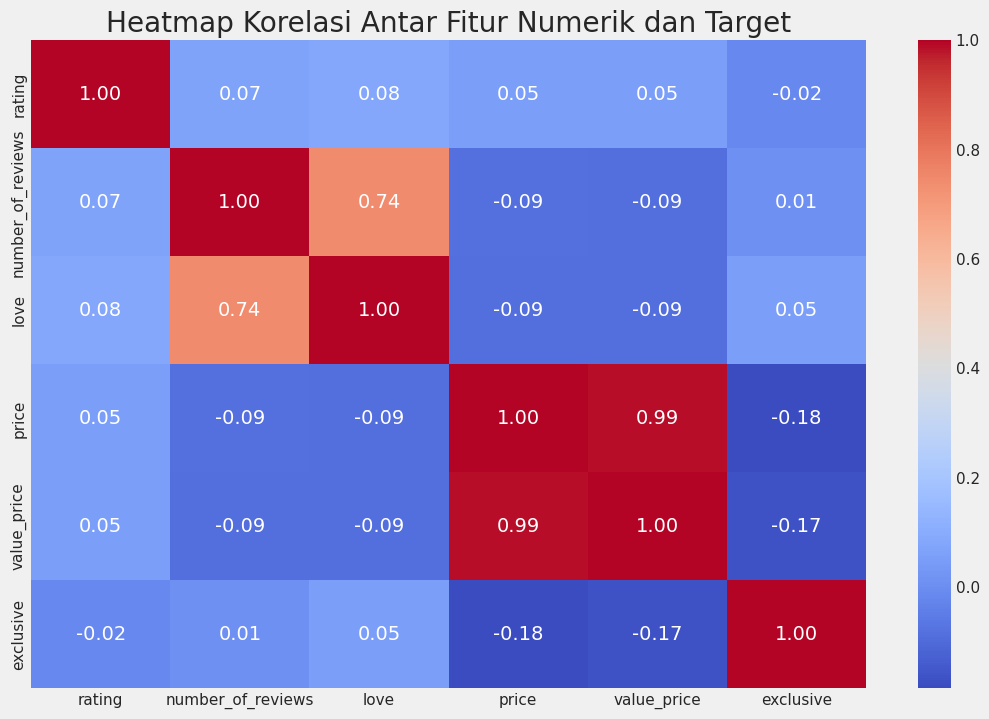


### Hubungan Fitur Numerik dengan Target ###


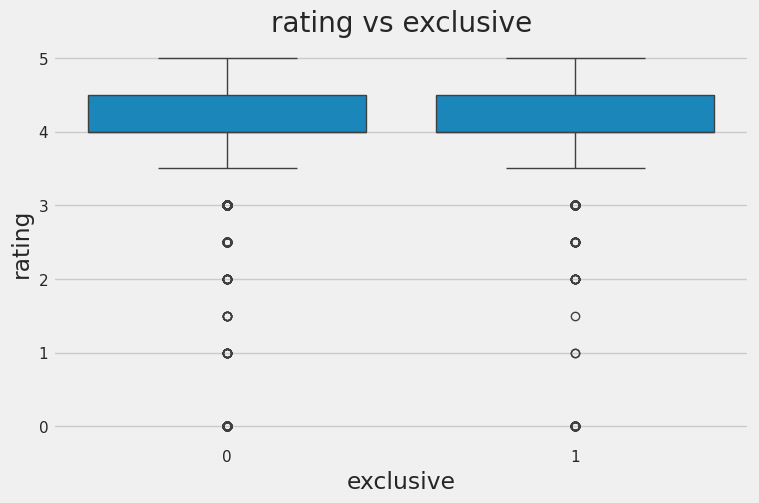

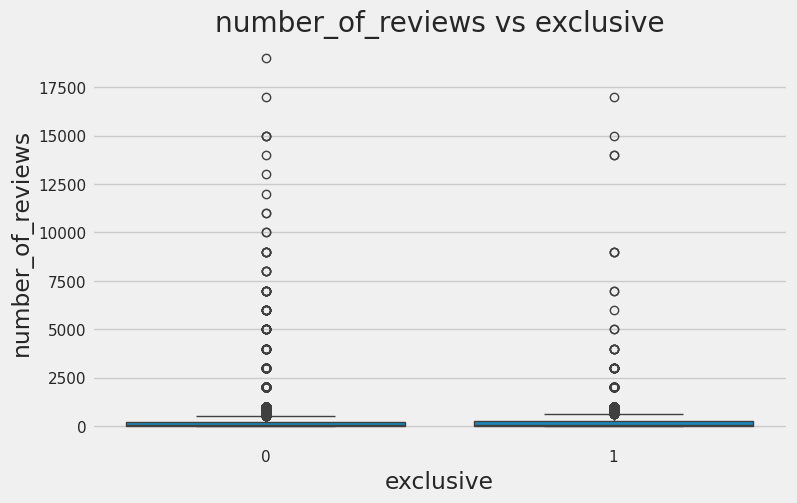

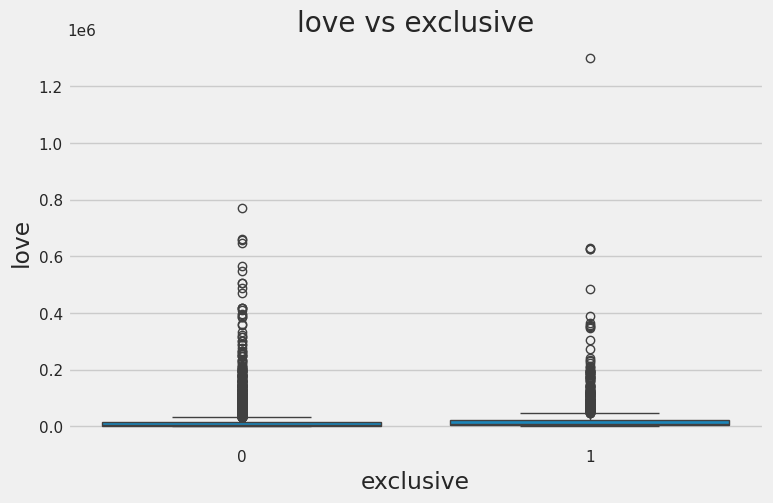

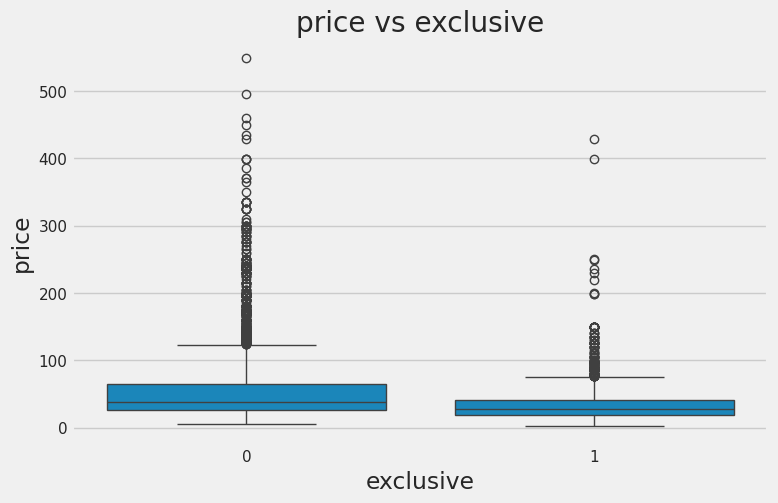

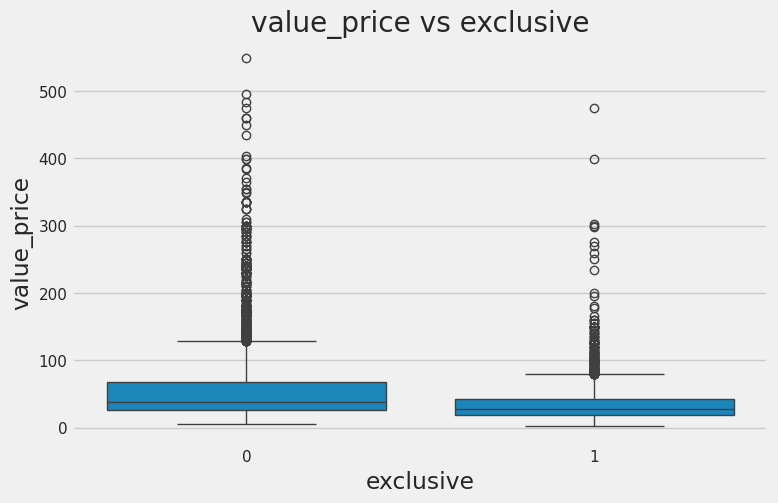


### Hubungan Fitur Kategorikal dengan Target ###


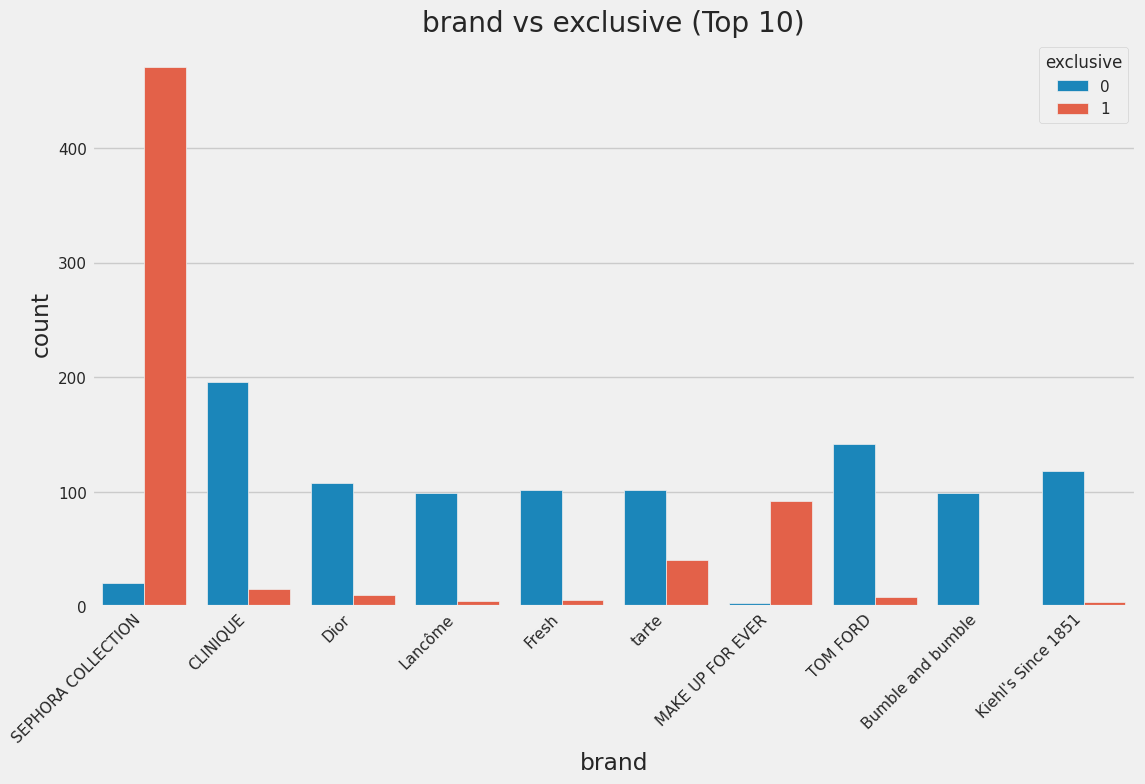

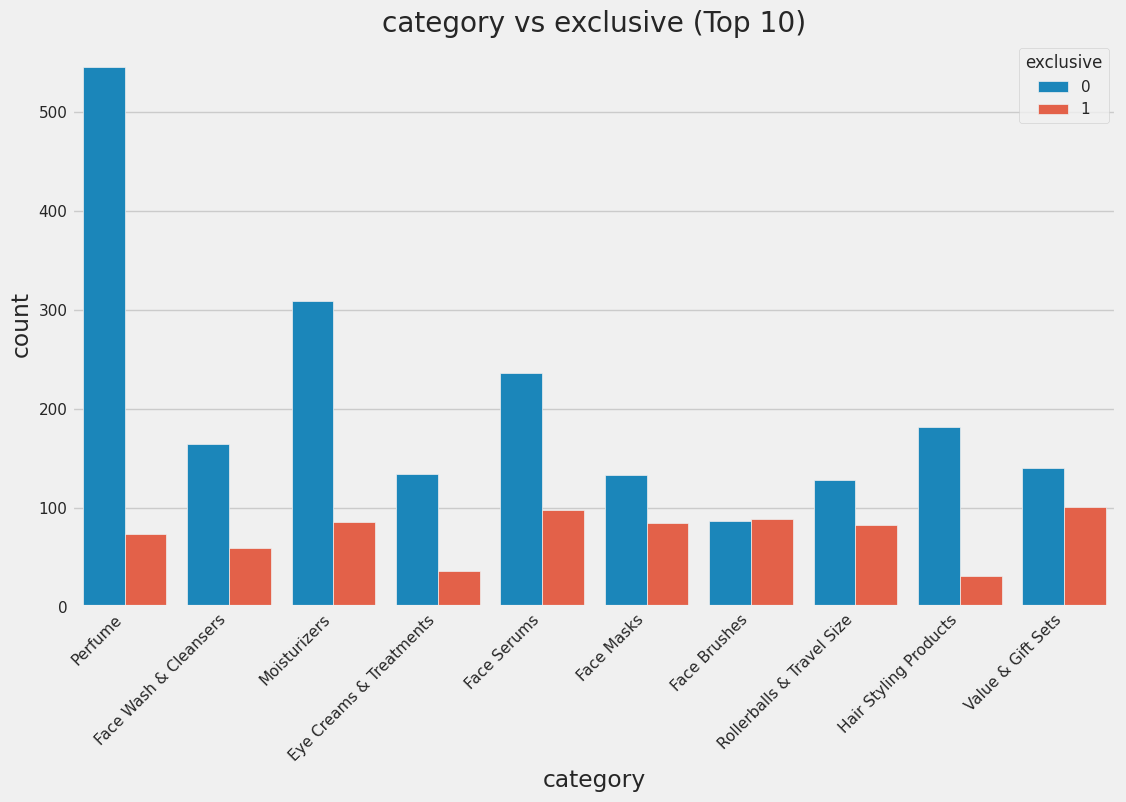

In [ ]:
# A. Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols + [target_col]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik dan Target')
plt.show()

# B. Hubungan fitur dengan target
# Numerik vs Target
print("\n### Hubungan Fitur Numerik dengan Target ###")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[target_col], y=df[col])
    plt.title(f'{col} vs {target_col}')
    plt.show()

# Kategorikal vs Target
print("\n### Hubungan Fitur Kategorikal dengan Target ###")
for col in categorical_cols:
    # Mengambil top 10 kategori untuk perbandingan agar lebih jelas
    top_categories = df[col].value_counts().nlargest(10).index
    df_top = df[df[col].isin(top_categories)]

    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_top, x=col, hue=target_col)
    plt.title(f'{col} vs {target_col} (Top 10)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

### A. Korelasi Fitur dengan Target
Fitur kategorikal **`brand`** dan **`category`** adalah prediktor yang paling relevan, karena distribusinya sangat bervariasi tergantung pada produk itu eksklusif atau tidak. Di antara fitur numerik, **`price`** dan **`value_price`** memiliki korelasi negatif yang paling signifikan meskipun tergolong lemah. Fitur lainnya seperti `rating` dan `number_of_reviews` menunjukkan korelasi yang sangat kecil sehingga dapat dianggap kurang relevan.

---
### B. Korelasi Antar Fitur
Analisis korelasi antar-fitur menunjukkan adanya **multikolinearitas** yang sangat tinggi antara **`price`** dan **`value_price`** (korelasi 0.99), yang berarti keduanya membawa informasi yang redundan. Selain itu, **`love`** dan **`number_of_reviews`** juga memiliki korelasi positif yang kuat (0.74). Sangat disarankan untuk **menghapus salah satu dari kolom `price` atau `value_price`** untuk meningkatkan kualitas model.

## Insight (20 Poin)

### Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?
Berikut adalah insight utamanya dalam bentuk poin-poin singkat:

1. **Pentingnya Pra-pemrosesan Data:** Data mentah memiliki banyak masalah seperti nilai kosong, distribusi miring, dan target yang tidak seimbang, sehingga pembersihan dan transformasi data adalah langkah krusial sebelum pemodelan.

2. **Brand & Kategori Sebagai Prediktor Utama:** Status eksklusif sebuah produk sangat ditentukan oleh merek dan kategorinya, menjadikannya fitur terpenting untuk prediksi.

3. **Metrik Popularitas Kurang Relevan:** Fitur seperti `rating`, `love`, dan jumlah ulasan ternyata memiliki korelasi yang sangat lemah dengan status eksklusif, artinya popularitas bukanlah faktor penentu.

4. **Insight Harga yang Mengejutkan:** Berlawanan dengan asumsi umum, produk eksklusif justru cenderung memiliki harga median yang lebih rendah, mengindikasikan "eksklusif" tidak selalu berarti "mahal".

5.  **Redundansi Informasi Antar Fitur:** Terdapat korelasi yang sangat tinggi antara `price` dan `value_price` (multikolinearitas), yang berarti salah satunya harus dihapus untuk menjaga kualitas model.

# Data Preparation

## Missing Value (5 Poin)

In [ ]:
df_cleaned = df.copy()

print("Jumlah missing values sebelum dibersihkan:")
print(df_cleaned.isnull().sum())

# Isi nilai kosong numerik dengan median, dan kategorikal dengan modus
for col in ['category', 'rating', 'number_of_reviews', 'love', 'price', 'value_price']:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

print("\nJumlah missing values setelah dibersihkan:")
print(df_cleaned.isnull().sum())

Jumlah missing values sebelum dibersihkan:
id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Jumlah missing values setelah dibersihkan:
id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64


## Duplicate Values (5 Poin)


In [ ]:
print(f"\nJumlah data duplikat: {df_cleaned.duplicated().sum()}")
df_cleaned.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat setelah dibersihkan: {df_cleaned.duplicated().sum()}")


Jumlah data duplikat: 0
Jumlah data duplikat setelah dibersihkan: 0


## Outliers (5 Poin)

In [ ]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = ((df_cleaned['price'] < lower_bound) | (df_cleaned['price'] > upper_bound)).sum()
print(f"\nJumlah outlier di kolom 'price': {outliers_count}")


Jumlah outlier di kolom 'price': 639


## Normalization/Standardization (5 Poin)


In [ ]:
for col in ['number_of_reviews', 'love', 'price', 'value_price']:
    df_cleaned[f'{col}_log'] = np.log1p(df_cleaned[col])
print("\nKolom skewed sudah ditransformasi dengan log.")


Kolom skewed sudah ditransformasi dengan log.


## Feature encoding (5 Poin)

In [ ]:
cols_to_encode = ['brand', 'category']
df_cleaned = pd.get_dummies(df_cleaned, columns=cols_to_encode, drop_first=True)
print("\nData setelah encoding:")
display(df_cleaned.head())


Data setelah encoding:


,id,rating,number_of_reviews,love,price,value_price,exclusive,number_of_reviews_log,love_log,price_log,...,category_Skincare Sets,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category
0,50,5.0,46.0,0.0,50.0,50.0,0,3.850148,0.0,3.931826,...,False,False,False,False,False,False,False,False,False,True
1,304,0.0,0.0,0.0,50.0,50.0,0,0.000000,0.0,3.931826,...,False,False,False,False,False,False,False,False,False,True
2,404,0.0,0.0,0.0,50.0,50.0,0,0.000000,0.0,3.931826,...,False,False,False,False,False,False,False,False,False,True
3,443,0.0,0.0,0.0,50.0,50.0,0,0.000000,0.0,3.931826,...,False,False,False,False,False,False,False,False,False,True
4,463,0.0,0.0,0.0,50.0,50.0,0,0.000000,0.0,3.931826,...,False,False,False,False,False,False,False,False,False,True


## Class imbalance (5 Poin)

In [ ]:
X = df_cleaned.drop([target_col, 'id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price'], axis=1)
y = df_cleaned[target_col]

# Pastikan semua fitur di X adalah numerik
if X.select_dtypes(include='object').shape[1] == 0:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("\nDistribusi kelas sebelum SMOTE:")
    print(y.value_counts(normalize=True))
    print("\nDistribusi kelas setelah SMOTE:")
    print(y_resampled.value_counts(normalize=True))
else:
    print("\nSMOTE tidak dijalankan. Pastikan semua kolom di X sudah numerik.")


Distribusi kelas sebelum SMOTE:
exclusive
0    0.744125
1    0.255875
Name: proportion, dtype: float64

Distribusi kelas setelah SMOTE:
exclusive
0    0.5
1    0.5
Name: proportion, dtype: float64


# Conclusion (10 Poin)
Menurut saya ini adalah 3 langkah pra-pemrosesan yang paling berdampak pada dataset ini, diurutkan dari yang paling krusial:

### 1. Penanganan Ketidakseimbangan Kelas
Ini adalah yang paling penting karena target `exclusive` sangat tidak seimbang (~75% vs 25%). Tanpa SMOTE, model kemungkinan besar akan sangat bias dan cenderung mengabaikan kelas minoritas (produk eksklusif), sehingga menghasilkan model yang tidak berguna dalam praktiknya meskipun akurasinya tinggi. Penyeimbangan ini secara fundamental mengubah apa yang dipelajari oleh model.

---
### 2. Encoding Fitur Kategorikal
Analisis menunjukkan bahwa `brand` dan `category` adalah fitur prediktor terkuat. Tanpa *encoding* (mengubah teks menjadi angka), kedua fitur ini tidak akan bisa digunakan sama sekali oleh model. Langkah ini secara langsung "membuka" akses model ke informasi yang paling prediktif, sehingga dampaknya terhadap performa sangat besar.

---
### 3. Transformasi Fitur (Log Transform)
Banyak fitur numerik seperti `price` dan `love` memiliki distribusi yang sangat miring (*skewed*) dengan nilai ekstrem. Transformasi logaritmik menormalkan distribusi ini, mencegah model terlalu dipengaruhi oleh beberapa data *outlier* saja. Hal ini membuat pola yang dipelajari model menjadi lebih stabil dan general, yang pada akhirnya meningkatkan akurasinya.

# FEATURE ENGINEERING

In [ ]:
df_final = df_cleaned.copy()


In [ ]:
# A. Feature Selection
cols_to_drop = ['id', 'value_price', 'rating', 'number_of_reviews', 'love', 'price']
df_final.drop(columns=[col for col in cols_to_drop if col in df_final.columns], inplace=True)
print("Kolom 'id' dan 'value_price' serta kolom-kolom asli yang sudah di-log transform dihapus.")

Kolom 'id' dan 'value_price' serta kolom-kolom asli yang sudah di-log transform dihapus.


In [ ]:
# B. Feature Extraction
df_final['reviews_per_love'] = df_final['number_of_reviews_log'] / (df_final['love_log'] + 1)
print("\nFitur baru 'reviews_per_love' berhasil dibuat.")


Fitur baru 'reviews_per_love' berhasil dibuat.


In [ ]:
# Tampilkan data final
print("\nData Final Siap untuk Modelling:")
display(df_final.head())


Data Final Siap untuk Modelling:


,exclusive,number_of_reviews_log,love_log,price_log,value_price_log,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,brand_Acqua Di Parma,brand_Aether Beauty,...,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category,reviews_per_love
0,0,3.850148,0.0,3.931826,3.931826,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3.850148
1,0,0.000000,0.0,3.931826,3.931826,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.000000
2,0,0.000000,0.0,3.931826,3.931826,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.000000
3,0,0.000000,0.0,3.931826,3.931826,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.000000
4,0,0.000000,0.0,3.931826,3.931826,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.000000



###  A. *Feature Selection* (Pemilihan Fitur)
Pemilihan fitur dilakukan untuk membuang kolom yang tidak relevan atau redundan guna meningkatkan efisiensi dan performa model.
* **Fitur yang Dihapus:**
    * `id`: Dihapus karena hanya merupakan identifier unik dan tidak memiliki nilai prediktif.
    * `value_price`: Dihapus karena memiliki korelasi yang sangat tinggi (0.99) dengan fitur `price`, sehingga dianggap redundan.
    * `rating`, `number_of_reviews`, `love`, `price`: Kolom-kolom asli ini dihapus karena versi transformasinya (misalnya, `price_log`) yang akan digunakan untuk pemodelan.

---
### B. *Feature Extraction* (Ekstraksi Fitur)
Ekstraksi fitur dilakukan untuk menciptakan fitur baru yang mungkin memiliki daya prediktif lebih baik daripada fitur aslinya.
* **Fitur Baru yang Dibuat:**
    * `reviews_per_love`: Fitur ini dibuat dengan membagi nilai `number_of_reviews_log` dengan `love_log`. Tujuannya adalah untuk menangkap rasio antara jumlah ulasan terhadap jumlah "cinta" yang diterima produk, yang mungkin bisa menjadi indikator keterlibatan pelanggan yang lebih bermakna.

---
### C. Ide Fitur Tambahan
Berikut adalah 4 ide fitur tambahan yang tidak ada di dataset, namun berpotensi besar untuk meningkatkan performa model:
1.  **Informasi Diskon**: Fitur biner yang menandakan apakah suatu produk sedang diskon (`1`) atau tidak (`0`), atau fitur numerik yang berisi persentase diskon. Produk eksklusif mungkin memiliki pola diskon yang berbeda.
2.  **Tanggal Rilis Produk**: Dari tanggal ini, kita bisa menciptakan fitur **"Umur Produk"** (Product Age). Produk yang lebih baru atau lebih lama mungkin memiliki kecenderungan berbeda untuk menjadi eksklusif.
3.  **Jumlah Penjual (Seller Count)**: Jumlah toko atau distributor resmi yang menjual produk tersebut. Produk yang hanya dijual di satu atau dua tempat (jumlah penjual rendah) kemungkinan besar adalah produk eksklusif.
4.  **Sentimen Ulasan Pelanggan**: Menganalisis teks ulasan untuk mendapatkan skor sentimen (misalnya, positif, netral, negatif). Pola sentimen bisa jadi berbeda antara produk eksklusif dan non-eksklusif.